# Neural Network


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Perceptron Algorithm


The perceptron algorithm was invented in 1958 at the Cornell Aeronautical Laboratory by Frank Rosenblatt. Perceptron mimics neuron, inputs data from other neurons and outputs to other neurons. 

Perceptron has its own weights `w1, w2, ...`, with input `x1, x2, ...`, total sum of inputs `x1w1 + x2w2 + ...` is lower than threshold $\theta$ outputs 0 vice versa, it is called activate.

Without changing structure, by changing weights and threshold we can build AND, NAND and OR gate.

In [5]:
def AND(x1, x2):
    w1 = 0.5
    w2 = 0.5
    theta = 0.7
    if w1 * x1 + w2 * x2 > theta:
        return 1
    else:
        return 0
print(AND(0,0))
print(AND(0,1))
print(AND(1,1))

0
0
1


Using multiple perceptrons we can also build XOR gate.

In [7]:
def NAND(x1, x2):
    w1 = -0.5
    w2 = -0.5
    theta = -0.7
    if w1 * x1 + w2 * x2 > theta:
        return 1
    else:
        return 0

def OR(x1, x2):
    w1 = 0.5
    w2 = 0.5
    theta = 0.2
    if w1 * x1 + w2 * x2 > theta:
        return 1
    else:
        return 0

def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1, x2))

print(XOR(0,0))
print(XOR(0,1))
print(XOR(1,1))

0
1
0


## Activation Function

Activation function outputs specific values when sum of inputs exceeds threshold. Step function, Sigmoid function, Tanh function and ReLu (Rectified linear unit) function are most commonly used activation functions.


### Step Function

Step function has output signal similar to shape of steps. Its outputs changes from `0` to `1` when `x=0`

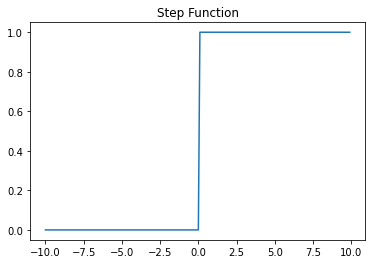

In [3]:
def stepfunc(x):
    return np.where(x <= 0, 0, 1) # if x <= 0 return 0, else return 1

x = np.arange(-10, 10, 0.1)
y = stepfunc(x)

plt.plot(x, y)
plt.title('Step Function')
plt.show()